In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Standard library imports
import warnings

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

# Ignore warnings
warnings.filterwarnings('ignore')


In [3]:
import sys
sys.path.append(r"C:\Users\ALAN\Documents\GitHub\Data_engineer_project_creation")

In [4]:
from created_functions.basic_analysys import *
from created_functions.pre_modeling_functions import *

In [5]:
file_path = "../Datasets/adjusted_dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.142213,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.000000,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.000000,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.000000,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.000000,10.381259,8.153887,No


# Check the proportions of the datasets 

## Simple sampling 

In [6]:
train_set_simple, test_set_simple = train_test_split(data, test_size = 0.2, random_state = 42)
print("Train dataset rows:")
print(len(train_set_simple))
print("\nTest dataset rows:")
print(len(test_set_simple))
print("\nEvaluate if both datasets contains all rows in original dataset")
print(int(len(train_set_simple)) + int(len(test_set_simple)) == int(len(data)))

Train dataset rows:
8000

Test dataset rows:
2000

Evaluate if both datasets contains all rows in original dataset
True


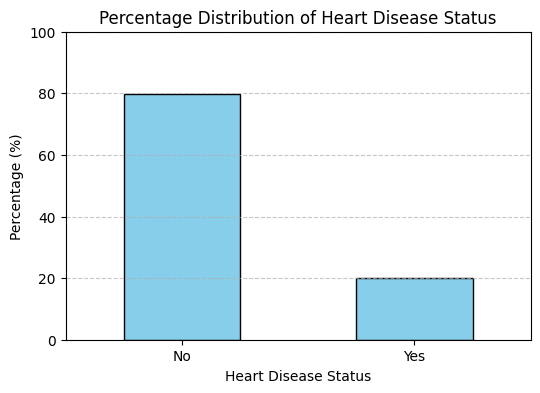

In [7]:
target_col = 'Heart Disease Status'
plot_target_percentage(train_set_simple, target_col)

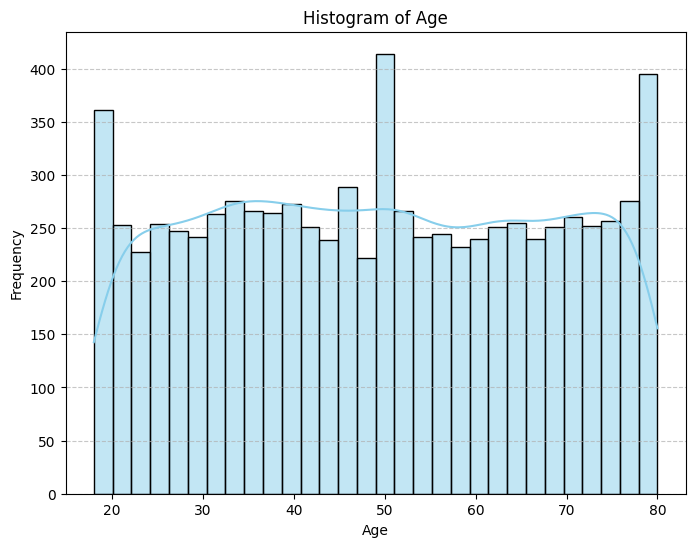

In [8]:
plot_numeric_histogram(train_set_simple, 'Age')

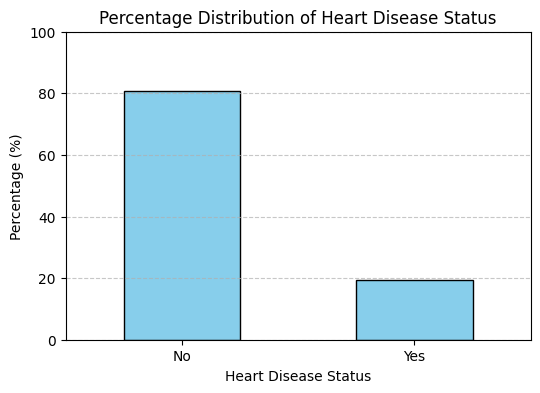

In [9]:
target_col = 'Heart Disease Status'
plot_target_percentage(test_set_simple, target_col)

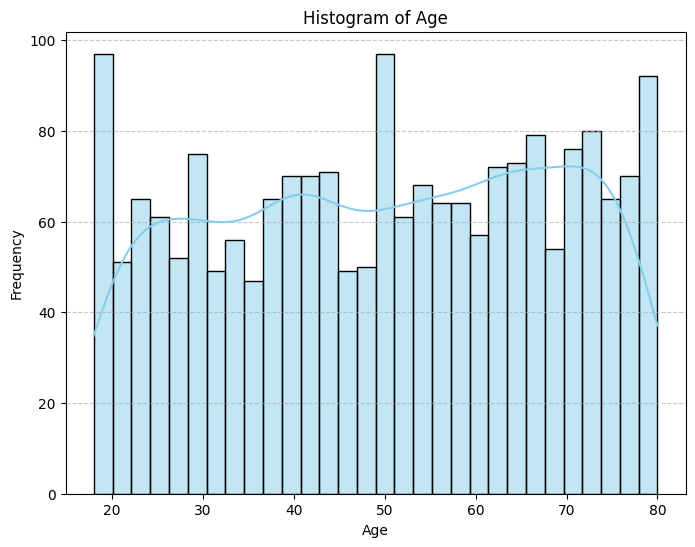

In [10]:
plot_numeric_histogram(test_set_simple, 'Age')

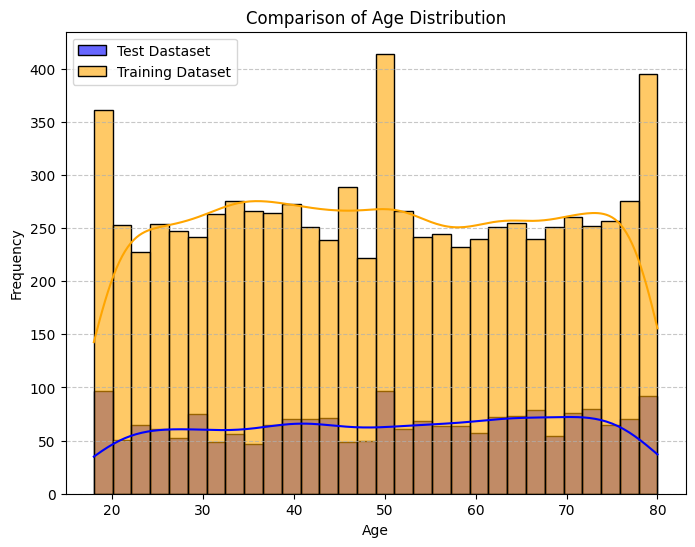

In [11]:
compare_histograms(test_set_simple, train_set_simple, 'Age', bins=30, labels=('Test Dastaset', 'Training Dataset'))

## Age-extracted sampling

In [12]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data["Age"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

print("Train dataset rows:")
print(len(strat_train_set))
print("\nTest dataset rows:")
print(len(strat_test_set))
print("\nEvaluate if both datasets contains all rows in original dataset")
print(int(len(strat_train_set)) + int(len(strat_test_set)) == int(len(data)))

Train dataset rows:
8000

Test dataset rows:
2000

Evaluate if both datasets contains all rows in original dataset
True


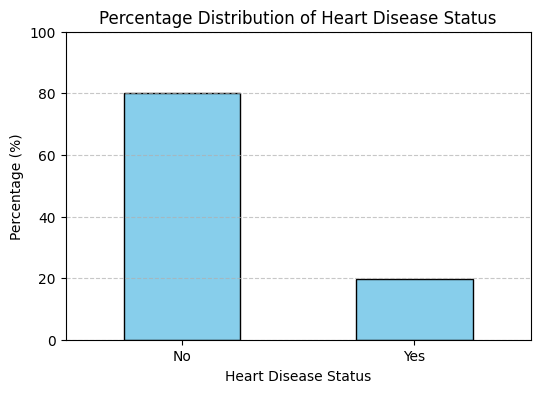

In [13]:
target_col = 'Heart Disease Status'
plot_target_percentage(strat_train_set, target_col)

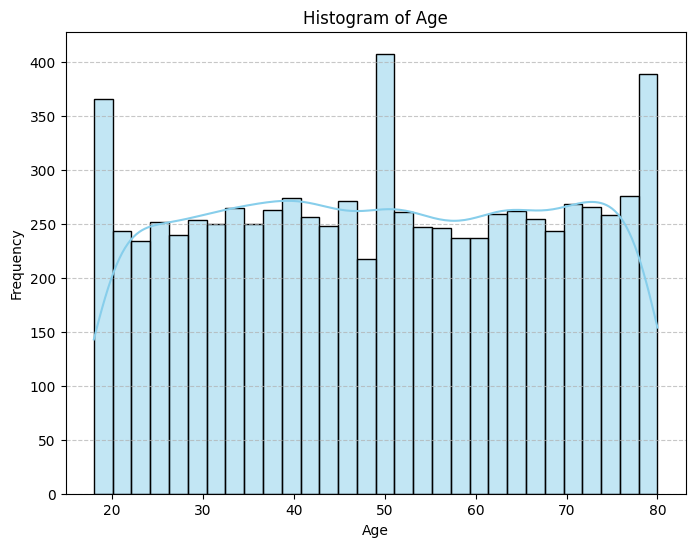

In [14]:
plot_numeric_histogram(strat_train_set, 'Age')

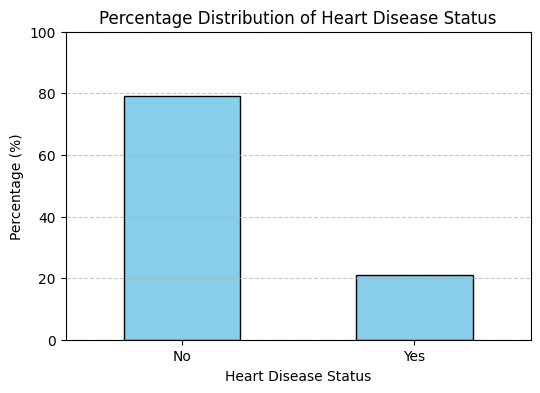

In [15]:
target_col = 'Heart Disease Status'
plot_target_percentage(strat_test_set, target_col)

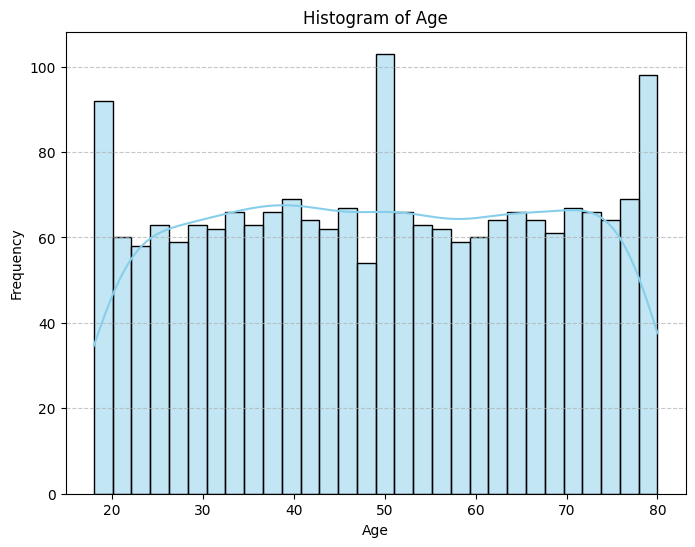

In [16]:
plot_numeric_histogram(strat_test_set, 'Age')

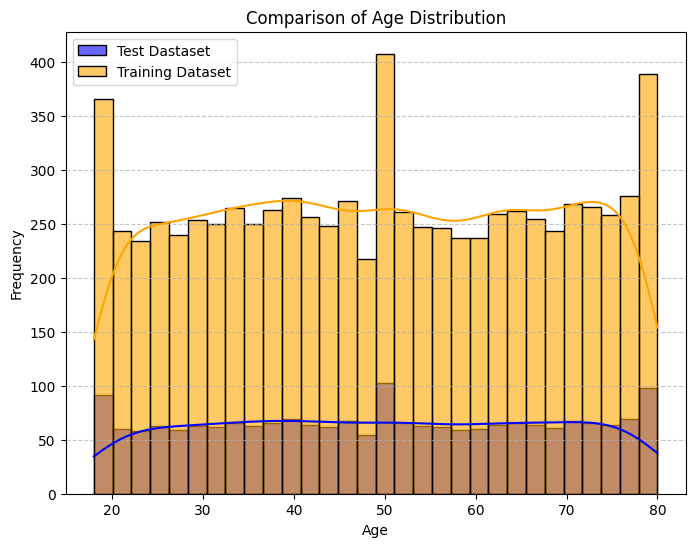

In [17]:
compare_histograms(strat_test_set, strat_train_set, 'Age', bins=30, labels=('Test Dastaset', 'Training Dataset'))

### Why Choose Stratified Sampling by Age?

In this analysis, stratified sampling by the `Age` variable was chosen over simple stratified sampling. This decision is supported by the following reasons:

1. **Preserving Target Variable Distribution**:
   - Stratified sampling by age ensures that the distribution of the target variable (`Heart Disease Status`) remains consistent across the training and test datasets. This guarantees that the representation of positive and negative cases is balanced between the datasets.

2. **Better Age Distribution Alignment**:
   - While maintaining the target variable distribution, stratified sampling by age provides a slightly more uniform distribution of the `Age` variable across the datasets. This adjustment reduces potential sampling bias and ensures better comparability between training and test sets.

3. **Relevance of Age as a Key Factor**:
   - Age is a well-known factor in cardiovascular disease studies, directly influencing the risk of heart-related conditions. By stratifying the dataset based on age, we incorporate this critical variable into the sampling process, ensuring that it is well-represented in both the training and test datasets.

By applying stratified sampling based on age, this approach aims to optimize the representativeness of the datasets while accounting for the importance of age as a predictor in the study of heart diseases.


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Blood Pressure', ylabel='Age'>,
        <Axes: xlabel='Cholesterol Level', ylabel='Age'>,
        <Axes: xlabel='BMI', ylabel='Age'>,
        <Axes: xlabel='Sleep Hours', ylabel='Age'>,
        <Axes: xlabel='Triglyceride Level', ylabel='Age'>,
        <Axes: xlabel='CRP Level', ylabel='Age'>,
        <Axes: xlabel='Homocysteine Level', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Blood Pressure'>,
        <Axes: xlabel='Blood Pressure', ylabel='Blood Pressure'>,
        <Axes: xlabel='Cholesterol Level', ylabel='Blood Pressure'>,
        <Axes: xlabel='BMI', ylabel='Blood Pressure'>,
        <Axes: xlabel='Sleep Hours', ylabel='Blood Pressure'>,
        <Axes: xlabel='Triglyceride Level', ylabel='Blood Pressure'>,
        <Axes: xlabel='CRP Level', ylabel='Blood Pressure'>,
        <Axes: xlabel='Homocysteine Level', ylabel='Blood Pressure'>],
       [<Axes: xlabel='Age', ylabel='Cholesterol Level'>,
        <A

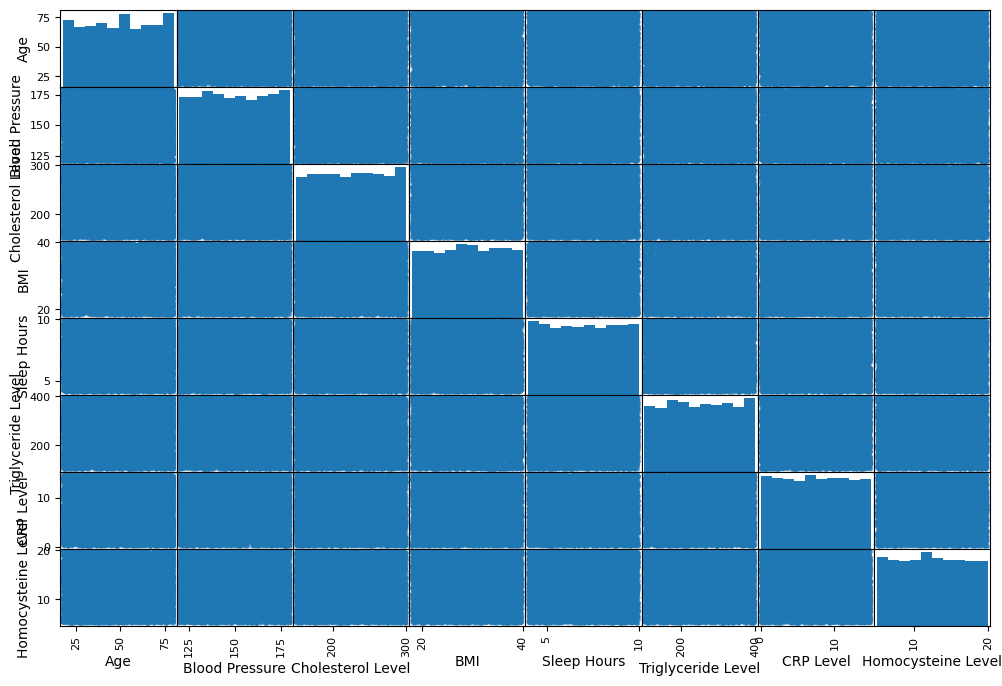

In [18]:
# Define the attributes you want to display in the scatter matrix
attributes = ["Age", "Blood Pressure", "Cholesterol Level", "BMI", 
              "Sleep Hours", "Triglyceride Level", "CRP Level", "Homocysteine Level"]

# Create the hash matrix
scatter_matrix(data[attributes], figsize=(12, 8))

### Why Are Triglyceride Level and Cholesterol Level the Most Promising Attributes?

The analysis of the scatter matrix revealed that **Triglyceride Level** and **Cholesterol Level** exhibit a clear positive correlation, making them the most promising attributes for further analysis. Here are the reasons:

1. **Strong Correlation**:
   - The scatter plot between these two attributes shows a strong positive linear relationship. This suggests that as one increases, the other tends to increase as well.
   - This correlation is expected due to their biological connection. Both are key indicators of lipid metabolism and are often studied together in cardiovascular research.

2. **Relevance to Cardiovascular Health**:
   - High levels of both triglycerides and cholesterol are well-established risk factors for heart disease. Monitoring these values provides valuable insight into an individual's cardiovascular risk profile.
   - Their combined impact is often greater than their individual effects, making them critical variables in predictive modeling for heart disease.

3. **Predictive Power**:
   - Including these attributes in a machine learning model is likely to enhance its predictive accuracy for heart disease, as these variables directly relate to the primary condition being studied.

By focusing on **Triglyceride Level** and **Cholesterol Level**, this analysis aligns with known medical research and ensures the inclusion of attributes that are both statistically and clinically significant.


# Creating new useful features for the model 

## 1. Indices or Numerical Combinations

In [19]:
data['Cholesterol_to_Triglyceride_Ratio'] = data['Cholesterol Level'] / data['Triglyceride Level']
data['BMI_to_Age_Ratio'] = data['BMI'] / data['Age']
data['Avg_Blood_Sugar_Triglyceride'] = (data['Fasting Blood Sugar'] + data['Triglyceride Level']) / 2

## 2. Aggregation of Categories

### Risk Score Based on Lifestyle

In [20]:
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}  # Mapping lifestyle levels to numerical scores
data['Exercise_Habit_Score'] = data['Exercise Habits'].map(risk_mapping)
data['Stress_Level_Score'] = data['Stress Level'].map(risk_mapping)
data['Lifestyle_Risk_Score'] = (
    data['Exercise_Habit_Score'] + data['Stress_Level_Score'] +
    (data['Smoking'] == 'Yes').astype(int) + (data['Alcohol Consumption'] == 'High').astype(int)
)

### Combined Cholesterol Status

In [21]:
data['High_Risk_Cholesterol'] = (
    (data['Low HDL Cholesterol'] == 'Yes') & (data['High LDL Cholesterol'] == 'Yes')
).astype(int)

## 3. Interactions Between Variables

### Hypertension and Heart Risk

In [22]:
data['High_Heart_Risk'] = (
    (data['High Blood Pressure'] == 'Yes') & (data['Family Heart Disease'] == 'Yes')
).astype(int)

# Exercise and Stress Interaction
data['Low_Exercise_High_Stress'] = (
    (data['Exercise Habits'] == 'Low') & (data['Stress Level'] == 'High')
).astype(int)

## 4. Categorization or Binning

### Age Groups

In [23]:
bins_age = [0, 18, 35, 55, 80]
labels_age = ['Child', 'Young Adult', 'Middle Age', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)

### BMI Categories

In [24]:
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obesity']
data['BMI_Category'] = pd.cut(data['BMI'], bins=bins_bmi, labels=labels_bmi)

### Blood Pressure Risk Levels

In [25]:
bins_bp = [0, 120, 129, 200]
labels_bp = ['Normal', 'Elevated', 'Hypertension']
data['Blood_Pressure_Level'] = pd.cut(data['Blood Pressure'], bins=bins_bp, labels=labels_bp)

## 5. Binary Indicators

### Diabetes Risk

In [26]:
data['Diabetes_Risk'] = (data['Fasting Blood Sugar'] > 126).astype(int)

### Insufficient Sleep

In [27]:
data['Low_Sleep'] = (data['Sleep Hours'] < 6).astype(int)

## 6. Count of Similar Categories

### Lifestyle Risk Count

In [28]:
data['Lifestyle_Risk_Count'] = (
    (data['Smoking'] == 'Yes').astype(int) +
    (data['Alcohol Consumption'] == 'High').astype(int) +
    (data['Exercise Habits'] == 'Low').astype(int)
)

In [29]:
# Displaying the first few rows of the dataset with the new columns
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,Lifestyle_Risk_Score,High_Risk_Cholesterol,High_Heart_Risk,Low_Exercise_High_Stress,Age_Group,BMI_Category,Blood_Pressure_Level,Diabetes_Risk,Low_Sleep,Lifestyle_Risk_Count
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,5,0,1,0,Senior,Overweight,Hypertension,0,0,2
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,4,0,0,0,Senior,Overweight,Hypertension,1,0,0
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,0,1,0,0,Middle Age,Overweight,Elevated,0,1,1
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,5,0,1,0,Young Adult,Normal,Elevated,0,1,1
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,3,0,1,1,Senior,Normal,Hypertension,1,0,2


# Normalizing data

In [30]:
processed_data = preprocess_dataset(data)
processed_data.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Cholesterol_to_Triglyceride_Ratio,...,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status_No,Heart Disease Status_Yes
0,0.612903,0.550000,0.033333,0.317756,0.605503,0.806667,0.501778,0.864751,0.492507,0.030138,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.822581,0.433333,0.906667,0.328222,0.790657,0.110000,0.962500,0.623722,0.953319,0.684074,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.451613,0.100000,0.440000,0.538899,0.073314,0.976667,0.150000,0.847452,0.415412,0.067283,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.225806,0.033333,0.953333,0.278604,0.208156,0.643333,0.175000,0.834058,0.064120,0.240820,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.677419,0.766667,0.613333,0.112914,0.505116,0.543333,0.925000,0.692144,0.210260,0.210054,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
# Set the path to save the file
output_path = r"C:\Users\ALAN\Documents\GitHub\Data_engineer_project_creation\Datasets\pre_modeling_dataset.csv"
# Save the adjusted dataset in CSV format
data.to_csv(output_path, index=False)
print(f"Dataset successfully saved to: {output_path}")

Dataset successfully saved to: C:\Users\ALAN\Documents\GitHub\Data_engineer_project_creation\Datasets\pre_modeling_dataset.csv
